In [42]:
import pandas as pd
import time
from pathlib import Path
import datetime as dt
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib qt
pd.options.display.float_format = '{:.5f}'.format
sns.set(rc={'figure.figsize':(25,15)})

In [2]:

#cols =['date','prices', 'market_caps', 'total_volumes']
def concat_dfs(path = 'Top_from_21_03_2021/'):
    
    df_main = pd.DataFrame()
    
    p =path
    
    for file in Path(p).glob('*.csv'):
        ticker = str(file).split('\\')[-1].split('_')[0]
        
        df_coin_data = pd.read_csv(file, index_col='date', parse_dates=True).rename(columns={'prices': f'{ticker}_cl', 
                                                                                         'market_caps':f'{ticker}_mktcap',
                                                                                         'total_volumes':f'{ticker}_vol'}
                                                                               )
        df_coin_data.index = df_coin_data.index.date
        df_main = pd.concat([df_main,df_coin_data],axis=1, join='outer' )
        
    return df_main

In [3]:
all_symbols = concat_dfs()
all_symbols.sort_index(inplace=True)
last_date = all_symbols.index[-1]
days_back = 60 #badany okres
# selekcja danych do badania
test_data = all_symbols.loc[last_date-dt.timedelta(days_back):].filter(regex="_cl$").fillna(method='ffill')

In [4]:
nansy = test_data.isna().sum().sort_values(ascending=False)
# Poglądowo gdzie są nansy 
nansy.head(10)

my-neighbor-alice_cl    51
litentry_cl             12
flow_cl                  4
0x_cl                    0
quark-chain_cl           0
pancakeswap-token_cl     0
paxos-standard_cl        0
polkadot_cl              0
polkastarter_cl          0
polymath-network_cl      0
dtype: int64

In [5]:
# dane bez nansów
test_data = test_data.loc[:,nansy==0]

In [6]:
#stopy zwrotu i drawdowny
returns = test_data.apply(lambda x:((x.pct_change()+1).cumprod()-1)*100)
drawdowns = test_data.apply(lambda x:((x-x.cummax())/x.cummax())*100)

In [33]:
start_price=test_data.iloc[0]
# giltry z podziałem na ceny
coins_to_1 = start_price[(start_price>0.2) & (start_price<=1)].index # nie uwzględniam ponizej ceny 0.2,zeby wywalić smieci
coins_1_to_10 = start_price[(start_price>1) & (start_price<=10)].index
coins_10_to_100 = start_price[(start_price>10) & (start_price<=100)].index
coins_100_to_1000 = start_price[(start_price>100) & (start_price<=1000)].index
coins_above_1000 = start_price[start_price>1000].index

In [43]:
sns.heatmap(returns[coins_1_to_10], robust=True) 

<AxesSubplot:>

<AxesSubplot:>

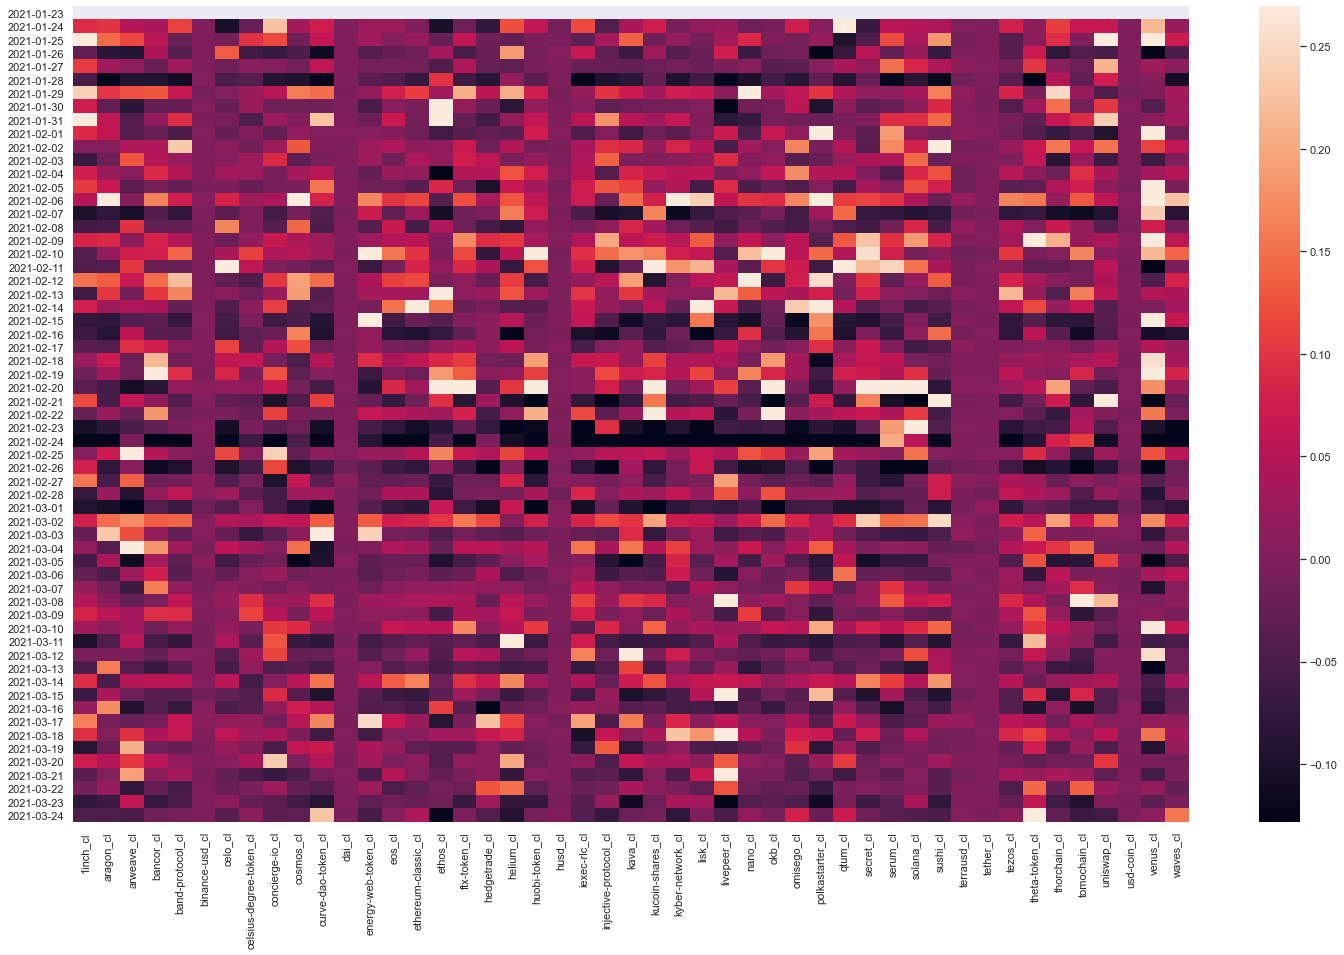

In [20]:
sns.heatmap(test_data[coins_1_to_10].pct_change(),robust=True)

<AxesSubplot:>

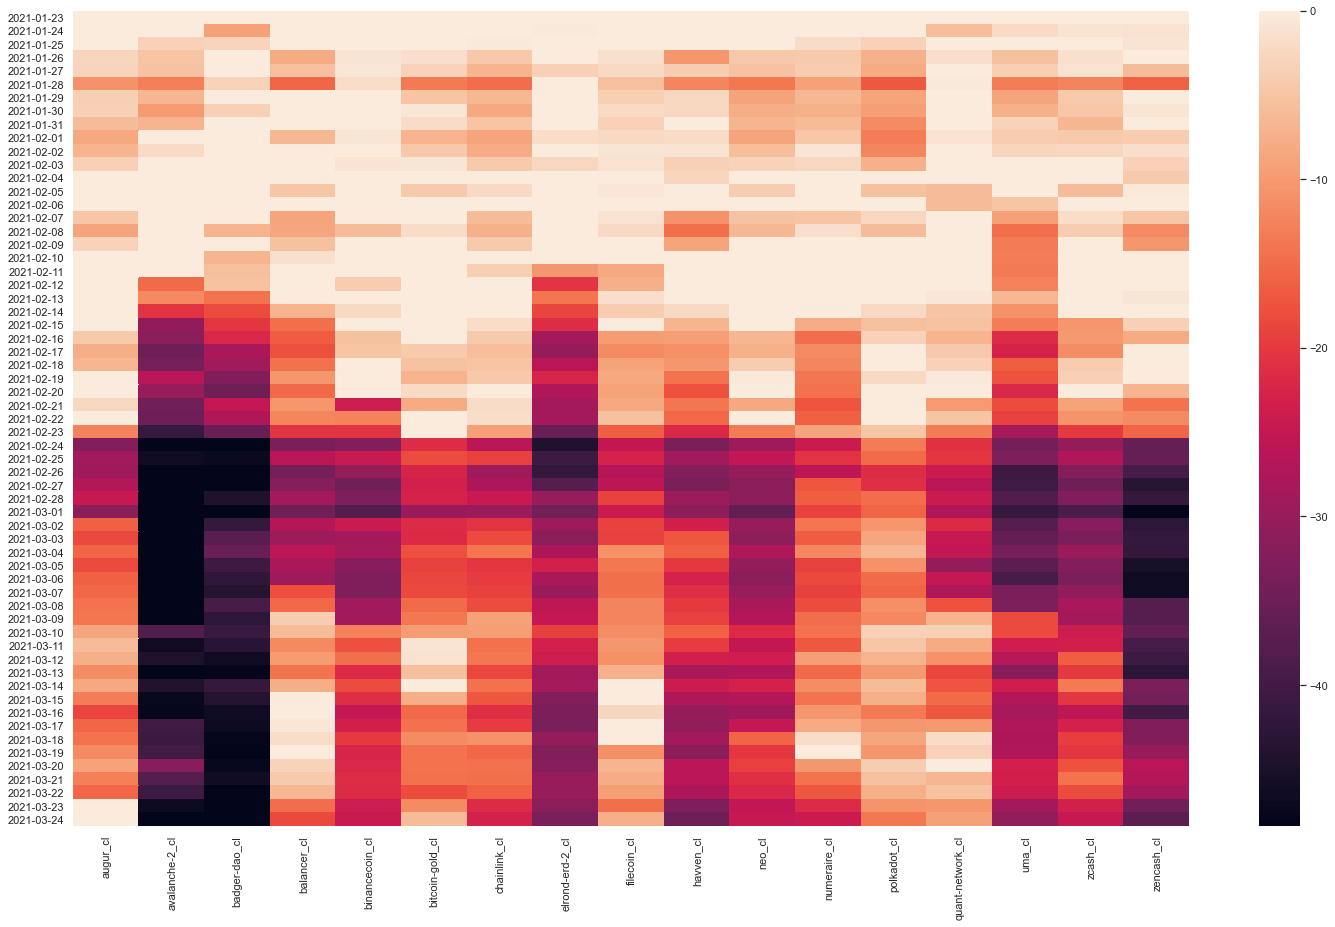

In [17]:
sns.heatmap(drawdowns[coins_10_to_100], robust=True)

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 2021-01-23 to 2021-03-24
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   0x_cl                     61 non-null     float64
 1   algorand_cl               61 non-null     float64
 2   alpha-finance_cl          61 non-null     float64
 3   ark_cl                    61 non-null     float64
 4   basic-attention-token_cl  61 non-null     float64
 5   bitcoin-diamond_cl        61 non-null     float64
 6   blockstack_cl             61 non-null     float64
 7   cardano_cl                61 non-null     float64
 8   dodo_cl                   61 non-null     float64
 9   enjincoin_cl              61 non-null     float64
 10  icon_cl                   61 non-null     float64
 11  iota_cl                   61 non-null     float64
 12  komodo_cl                 61 non-null     float64
 13  loopring_cl               61 non-null     float64
 14  